#ML LAB WORK 2
##Adeline Kong Earn Ning 22004762

In [73]:
# Upload dataset from github
!git clone https://github.com/iamAden/MLabWork2

fatal: destination path 'MLabWork2' already exists and is not an empty directory.


In [138]:
#import
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
!pip install keras-tuner
from kerastuner import HyperModel, RandomSearch
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Data Preprocessing

In [75]:
# read file
red_data = pd.read_csv('./MLabWork2/winequality-red.csv',  sep=';')
white_data = pd.read_csv('./MLabWork2/winequality-white.csv',  sep=';')

# Add a column to identify the wine type (0 is White, 1 is Red)
red_data['Wine Type'] = 1
white_data['Wine Type'] = 0

# Merge the datasets
wine_data = pd.concat([white_data, red_data])

wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [76]:
# Select the numerical features to normalize
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                      'pH', 'sulphates', 'alcohol', 'quality']

# Normalize the numerical features
scaler = MinMaxScaler()
wine_data[numerical_features] = scaler.fit_transform(wine_data[numerical_features])

wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.500000,0
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.500000,0
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.500000,0
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.500000,0
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.150183,0.565891,0.202247,0.362319,0.333333,1
1595,0.173554,0.313333,0.060241,0.024540,0.088040,0.131944,0.103687,0.154425,0.620155,0.303371,0.463768,0.500000,1
1596,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.166377,0.542636,0.297753,0.434783,0.500000,1
1597,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.161172,0.658915,0.275281,0.318841,0.333333,1


In [77]:
# Separate the features and target variable
features = wine_data.drop(['Wine Type'], axis=1)
labels = wine_data['Wine Type']

# Split the dataset into training, validation, and testing sets
train_features, temp_features, train_labels, temp_labels = train_test_split(features, labels, test_size=0.15, random_state=42)
val_features, test_features, val_labels, test_labels = train_test_split(temp_features, temp_labels, test_size=0.2, random_state=42)

# Determine the  number of features
num_features = wine_data.shape[1] - 1

# Determine the number of classes
num_classes = labels.nunique()


##1. Simple Feedforward Neural Network (FFN)
FFN, or Feedforward Neural Network, is a basic type of neural network where information flows in a single direction, from input to output. It consists of multiple layers of interconnected neurons, with each neuron receiving input from the previous layer and producing an output based on its activation function.

Epoch 1/20
96/96 [==============================] - 1s 5ms/step - loss: 0.4762 - accuracy: 0.7760 - val_loss: 0.2551 - val_accuracy: 0.9269
Epoch 2/20
96/96 [==============================] - 0s 3ms/step - loss: 0.1443 - accuracy: 0.9663 - val_loss: 0.0876 - val_accuracy: 0.9756
Epoch 3/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9806 - val_loss: 0.0675 - val_accuracy: 0.9833
Epoch 4/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9850 - val_loss: 0.0565 - val_accuracy: 0.9859
Epoch 5/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9868 - val_loss: 0.0518 - val_accuracy: 0.9859
Epoch 6/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9880 - val_loss: 0.0486 - val_accuracy: 0.9872
Epoch 7/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9893 - val_loss: 0.0481 - val_accuracy: 0.9846
Epoch 8/20
96/96 [==

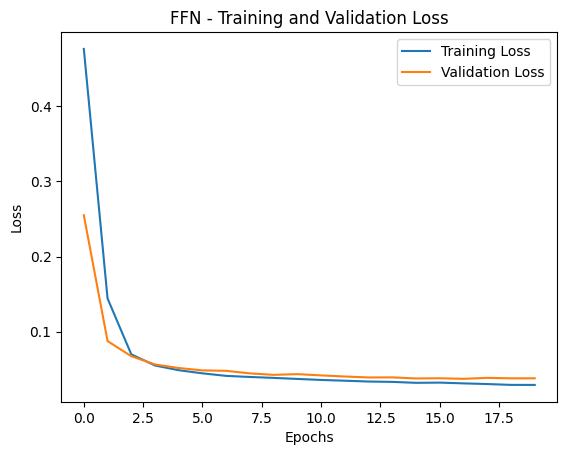

In [78]:
# Define the Simple Feedforward Neural Network architecture
def create_simple_ffn():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(num_features,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create the Simple Feedforward Neural Network model
simple_ffn_model = create_simple_ffn()

# Compile the model
simple_ffn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 58
epochs = 20

simple_ffn_history = simple_ffn_model.fit(train_features, train_labels, batch_size=batch_size, epochs=epochs,
                                          validation_data=(val_features, val_labels))

# Analyze the training and validation loss curves


plt.plot(simple_ffn_history.history['loss'], label='Training Loss')
plt.plot(simple_ffn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('FFN - Training and Validation Loss')
plt.legend()
plt.show()

In [79]:
# Mount Google Drive
drive.mount('/content/drive')

# Save the trained model
simple_ffn_model.save('/content/drive/MyDrive/trained_ffn_model2.h5') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Analysis for FFN**: 
Training loss and validation loss decrease to a point of stability and has a small gap between them. This is a good fit.

##2. Convolutional Neural Network (CNN)
CNN, or Convolutional Neural Network, is a type of neural network commonly used for image recognition and computer vision tasks. It uses convolutional layers to automatically learn hierarchical patterns and features from input data, making it well-suited for analyzing spatial relationships in images.

Epoch 1/15
88/88 [==============================] - 1s 6ms/step - loss: 0.4828 - accuracy: 0.7613 - val_loss: 0.3186 - val_accuracy: 0.9308
Epoch 2/15
88/88 [==============================] - 0s 4ms/step - loss: 0.1881 - accuracy: 0.9614 - val_loss: 0.1048 - val_accuracy: 0.9756
Epoch 3/15
88/88 [==============================] - 0s 4ms/step - loss: 0.0831 - accuracy: 0.9819 - val_loss: 0.0716 - val_accuracy: 0.9808
Epoch 4/15
88/88 [==============================] - 0s 4ms/step - loss: 0.0624 - accuracy: 0.9842 - val_loss: 0.0614 - val_accuracy: 0.9782
Epoch 5/15
88/88 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9855 - val_loss: 0.0545 - val_accuracy: 0.9872
Epoch 6/15
88/88 [==============================] - 0s 4ms/step - loss: 0.0500 - accuracy: 0.9871 - val_loss: 0.0517 - val_accuracy: 0.9833
Epoch 7/15
88/88 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 0.9884 - val_loss: 0.0489 - val_accuracy: 0.9885
Epoch 8/15
88/88 [==

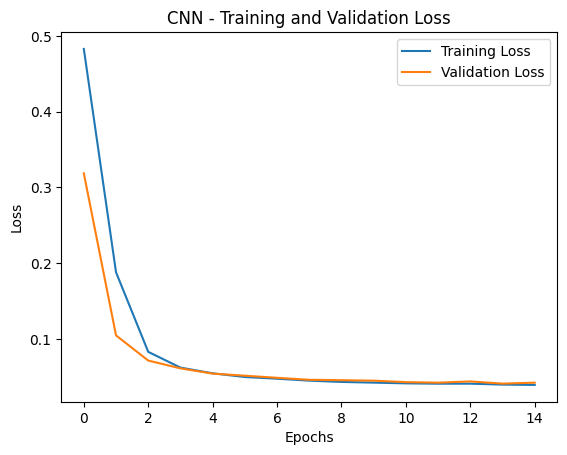

In [80]:
input_shape= num_features

# Define the Convolutional Neural Network (CNN) architecture
def create_cnn(input_shape):
    model = keras.Sequential([ 
        layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        layers.Conv1D(32, 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


# Create the CNN model
cnn_model = create_cnn(input_shape)

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 63
epochs = 15
cnn_history = cnn_model.fit(train_features, train_labels, batch_size=batch_size, epochs=epochs,
                            validation_data=(val_features, val_labels))

# Analyze the training and validation loss curves
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



###**Analysis for CNN**: 
Training loss and validation loss decrease to a point of stability and has a small gap between them. This is a good fit.

##**3. Recurrent Neural Network (RNN)**##

RNN, short for Recurrent Neural Network, is a type of neural network designed for sequential data processing. It has a recurrent connection that allows information to be persistently propagated through time, enabling it to capture temporal dependencies and handle variable-length input sequences.

Epoch 1/15
81/81 [==============================] - 3s 16ms/step - loss: 0.5672 - accuracy: 0.7512 - val_loss: 0.5343 - val_accuracy: 0.7756
Epoch 2/15
81/81 [==============================] - 1s 12ms/step - loss: 0.5628 - accuracy: 0.7512 - val_loss: 0.5348 - val_accuracy: 0.7756
Epoch 3/15
81/81 [==============================] - 1s 12ms/step - loss: 0.5645 - accuracy: 0.7512 - val_loss: 0.5335 - val_accuracy: 0.7756
Epoch 4/15
81/81 [==============================] - 1s 12ms/step - loss: 0.5622 - accuracy: 0.7512 - val_loss: 0.5369 - val_accuracy: 0.7756
Epoch 5/15
81/81 [==============================] - 1s 12ms/step - loss: 0.5618 - accuracy: 0.7512 - val_loss: 0.5329 - val_accuracy: 0.7756
Epoch 6/15
81/81 [==============================] - 1s 12ms/step - loss: 0.5619 - accuracy: 0.7512 - val_loss: 0.5335 - val_accuracy: 0.7756
Epoch 7/15
81/81 [==============================] - 1s 11ms/step - loss: 0.5617 - accuracy: 0.7512 - val_loss: 0.5325 - val_accuracy: 0.7756
Epoch 8/15
81

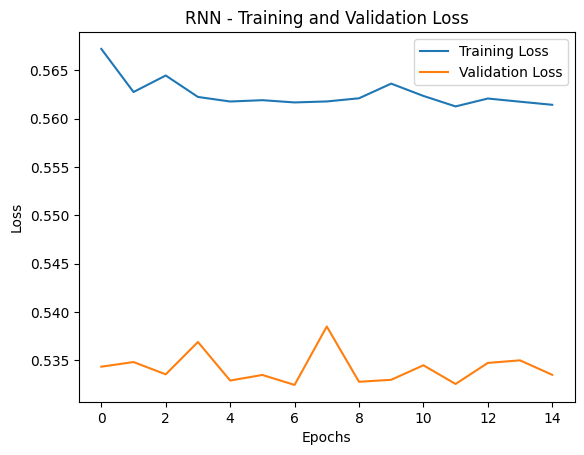

In [81]:
# Define the Recurrent Neural Network (RNN) architecture
def create_rnn(input_shape):
    model = keras.Sequential([
        layers.Embedding(input_dim=10000, output_dim=32, input_shape=(input_shape,)),
        layers.SimpleRNN(64),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create the RNN model
rnn_model = create_rnn(input_shape)

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 69
epochs = 15
rnn_history = rnn_model.fit(train_features, train_labels, batch_size=batch_size, epochs=epochs,
                            validation_data=(val_features, val_labels))

# Analyze the training and validation loss curves
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###**Analysis for RNN**##
Training loss is a flat line with noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all because the model does not have a suitable capacity for the complexity of the dataset.

## **4. Autoencoder**
Autoencoders are neural networks that are trained to reconstruct their input data, typically through an encoder-decoder architecture. They are used for unsupervised learning and can learn meaningful representations of the input data by compressing it into a lower-dimensional latent space and then reconstructing it back to its original form.

Epoch 1/10
101/101 [==============================] - 2s 6ms/step - loss: 0.1091 - val_loss: 0.0140
Epoch 2/10
101/101 [==============================] - 0s 4ms/step - loss: 0.0123 - val_loss: 0.0151
Epoch 3/10
101/101 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.0089
Epoch 4/10
101/101 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 5/10
101/101 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0095
Epoch 6/10
101/101 [==============================] - 1s 6ms/step - loss: 0.0064 - val_loss: 0.0078
Epoch 7/10
101/101 [==============================] - 1s 6ms/step - loss: 0.0069 - val_loss: 0.0124
Epoch 8/10
101/101 [==============================] - 1s 5ms/step - loss: 0.0062 - val_loss: 0.0070
Epoch 9/10
101/101 [==============================] - 1s 6ms/step - loss: 0.0053 - val_loss: 0.0063
Epoch 10/10
101/101 [==============================] - 1s 6ms/step - loss: 0.0047 - val_loss: 0.0140

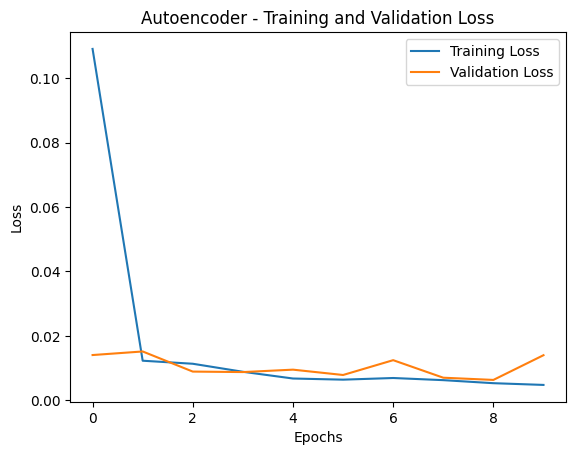

In [90]:
# Define the input shape
input_dim = num_features
input_shape = (input_dim,)  

# Define the encoder
encoder = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu')
])

# Define the decoder
decoder = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(32,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

# Combine the encoder and decoder into an autoencoder
autoencoder = keras.Sequential([encoder, decoder])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
batch_size = 55
epochs = 10
autoencoder_history = autoencoder.fit(train_features, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_features, val_labels))

# Analyze the training and validation loss curves
plt.plot(autoencoder_history.history['loss'], label='Training Loss')
plt.plot(autoencoder_history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


##**Analysis for Autoencoder**##
The model is underfitted. This is identified by a training loss that is decreasing and continues to decrease at the end of the plot. This indicates that the model is capable of further learning and possible further improvements and that the training process was halted prematurely.


##**5.  Multi-Layer Perceptron (MLP)**


A Multi-Layer Perceptron (MLP) is a type of artificial neural network that consists of multiple layers of interconnected neurons. It is one of the most basic and widely used architectures in deep learning.


Epoch 1/15
101/101 [==============================] - 1s 5ms/step - loss: 0.3824 - accuracy: 0.8410 - val_loss: 0.1186 - val_accuracy: 0.9769
Epoch 2/15
101/101 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9828 - val_loss: 0.0645 - val_accuracy: 0.9782
Epoch 3/15
101/101 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9859 - val_loss: 0.0506 - val_accuracy: 0.9872
Epoch 4/15
101/101 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9886 - val_loss: 0.0472 - val_accuracy: 0.9897
Epoch 5/15
101/101 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9899 - val_loss: 0.0447 - val_accuracy: 0.9872
Epoch 6/15
101/101 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9915 - val_loss: 0.0438 - val_accuracy: 0.9923
Epoch 7/15
101/101 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9909 - val_loss: 0.0399 - val_accuracy: 0.9897
Epoch 

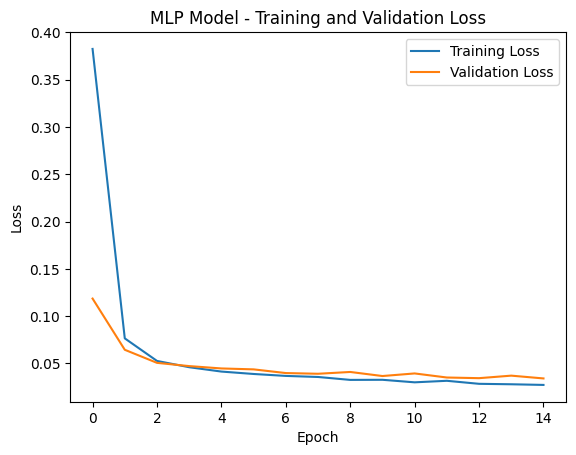

In [91]:
# Define the MLP model
def create_mlp(input_shape, num_classes):
    model = keras.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Set the input shape and number of classes
input_shape = (num_features,)  # Replace num_features with the actual number of input features
num_classes = 2  # Replace with the number of classes in your classification task

# Create the MLP model
mlp_model = create_mlp(input_shape, num_classes)

# Compile and train the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the MLP model and store the training history
batch_size = 55
epochs = 15

history = mlp_model.fit(train_features, train_labels, batch_size=batch_size, epochs=epochs,
                        validation_data=(val_features, val_labels))

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##**Analysis for MLP Model**
The model is underfitted. This is identified by a training loss that is Training loss and validation loss decrease to a point of stability and has a small gap between them. This is a good fit.


----------------------------------------------------------------------------------

#**Best Model is MLP Model** 
Multi-Layer Perceptron (MLP) is the best model architecture that being selected as it has the highest validation accuracy and it can effectively learn the underlying patterns in the data to make accurate predictions. A decreasing trend in both training and validation loss over epochs, it indicates that the model is learning and improving its performance.

In [120]:
# Define the MLP model
class MLPModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
    
    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                               activation='relu', input_shape=self.input_shape))
        model.add(layers.Dense(units=hp.Int('units_2', min_value=32, max_value=256, step=32),
                               activation='relu'))
        model.add(layers.Dense(self.num_classes, activation='softmax'))
         # Compile the model
        model.compile(optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

# Set the input shape and number of classes
input_shape = (num_features,)
num_classes = 2

# Create the MLP hypermodel
mlp_hypermodel = MLPModel(input_shape, num_classes)

# Define the hyperparameter search space
tuner = RandomSearch(
    mlp_hypermodel,
    objective='val_accuracy',
    max_trials=10,
    directory='tuner_directory',
    project_name='mlp_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(train_features, train_labels, epochs=10, validation_data=(val_features, val_labels))


# Get the best model and summary of hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

best_model.summary()

# Get all the trials and their results
trials = tuner.oracle.get_best_trials(num_trials=10)

# Create empty lists to store the hyperparameters and accuracy
hyperparameters = []
accuracies = []

# Iterate over each trial and retrieve hyperparameters and accuracy
for trial in trials:
    hyperparameters.append(trial.hyperparameters.values)
    accuracies.append(trial.score if trial.score else float('NaN'))

# Create a DataFrame to store the hyperparameters and accuracy
data = {'Hyperparameters': hyperparameters, 'Accuracy': accuracies}
df = pd.DataFrame(data)

# Print the table
print(df)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224)               2912      
                                                                 
 dense_1 (Dense)             (None, 96)                21600     
                                                                 
 dense_2 (Dense)             (None, 2)                 194       
                                                                 
Total params: 24,706
Trainable params: 24,706
Non-trainable params: 0
_________________________________________________________________
                                     Hyperparameters  Accuracy
0  {'units_1': 224, 'units_2': 96, 'optimizer': '...  0.996154
1  {'units_1': 160, 'units_2': 192, 'optimizer': ...  0.994872
2  {'units_1': 96, 'units_2': 96, 'optimizer': 'a...  0.991026
3  {'units_1': 224, 'units_2': 160, 'optimizer': ...  0.978205
4

In [124]:
# Get the best hyperparameters from the tuner
best_hparams = tuner.get_best_hyperparameters(1)[0]
best_optimizer = best_hparams.get('optimizer')

# Print the results summary table
df_results = tuner.results_summary()
print(df_results)

Results summary
Results in tuner_directory/mlp_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
units_1: 224
units_2: 96
optimizer: adam
Score: 0.9961538314819336

Trial 03 summary
Hyperparameters:
units_1: 160
units_2: 192
optimizer: adam
Score: 0.9948717951774597

Trial 02 summary
Hyperparameters:
units_1: 96
units_2: 96
optimizer: adam
Score: 0.9910256266593933

Trial 09 summary
Hyperparameters:
units_1: 224
units_2: 160
optimizer: sgd
Score: 0.978205144405365

Trial 06 summary
Hyperparameters:
units_1: 256
units_2: 224
optimizer: sgd
Score: 0.9743589758872986

Trial 04 summary
Hyperparameters:
units_1: 192
units_2: 160
optimizer: sgd
Score: 0.9730769395828247

Trial 07 summary
Hyperparameters:
units_1: 256
units_2: 32
optimizer: sgd
Score: 0.9730769395828247

Trial 05 summary
Hyperparameters:
units_1: 128
units_2: 32
optimizer: sgd
Score: 0.9730769395828247

Trial 00 summary
Hyperparameters:
units_1: 192

In [125]:
# Print the best hyperparameter configuration
print("\nBest Hyperparameter Configuration")
print("Optimizer:", best_optimizer)


Best Hyperparameter Configuration
Optimizer: adam


#**Model Evaluation**
Using by ROC curve and confusion matrix

7/7 [==============================] - 0s 2ms/step


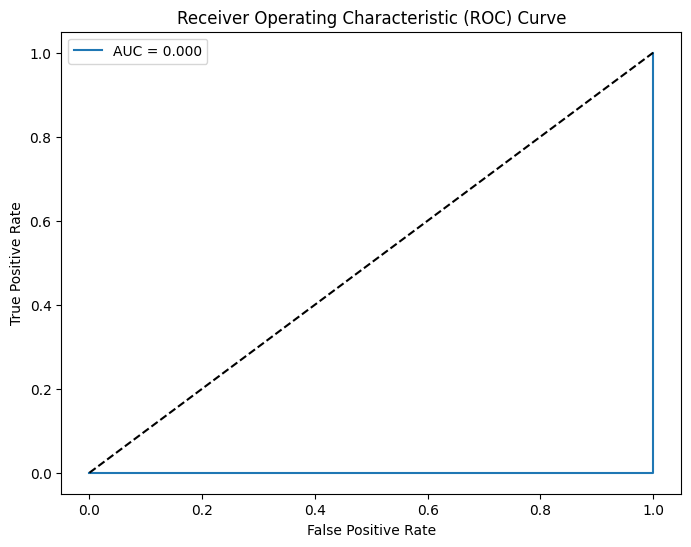

In [127]:
# Generate predictions from the model
predictions = best_model.predict(test_features)

# Calculate the probabilities for the positive class
probabilities = predictions[:, 0]

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, probabilities)

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(test_labels, probabilities)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

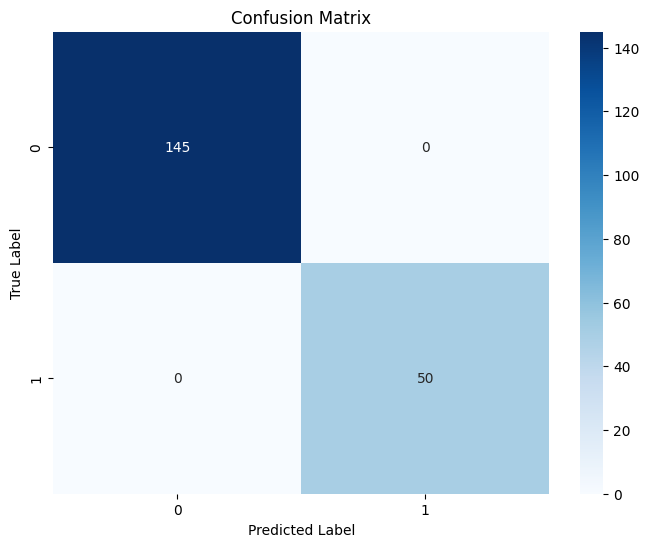

In [136]:
# Calculate the confusion matrix
predicted_labels = predictions.argmax(axis=1)
cm = confusion_matrix(test_labels, predicted_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [139]:
# Compute and print the performance metrics
print("Confusion Matrix:")
print(confusion_matrix(test_labels, predicted_labels))
print("\n")
print("Accuracy Score:")
print(accuracy_score(test_labels, predicted_labels))

Confusion Matrix:
[[145   0]
 [  0  50]]


Accuracy Score:
1.0
